# Algorithms Exercise 1

## Imports

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [3]:
file = open("mobydick_chapter1.txt")
mobydick = file.read()

mobydick = mobydick.splitlines()
mobydick = " ".join(mobydick)

punctuation = ["-", ",", "."]

mobydick = list(mobydick)
mobydick_f = list(filter(lambda c: c not in punctuation, mobydick))

mobydick_f = "".join(mobydick_f)

stop_words = ["of", "or", "in"]

mobydick_fs = mobydick_f.split()
mobydick_fs = list(filter(lambda w: w not in stop_words, mobydick_fs))



        


    
print(mobydick_fs)




['Call', 'me', 'Ishmael', 'Some', 'years', 'agonever', 'mind', 'how', 'long', 'preciselyhaving', 'little', 'no', 'money', 'my', 'purse', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'the', 'world', 'It', 'is', 'a', 'way', 'I', 'have', 'driving', 'off', 'the', 'spleen', 'and', 'regulating', 'the', 'circulation', 'Whenever', 'I', 'find', 'myself', 'growing', 'grim', 'about', 'the', 'mouth;', 'whenever', 'it', 'is', 'a', 'damp', 'drizzly', 'November', 'my', 'soul;', 'whenever', 'I', 'find', 'myself', 'involuntarily', 'pausing', 'before', 'coffin', 'warehouses', 'and', 'bringing', 'up', 'the', 'rear', 'every', 'funeral', 'I', 'meet;', 'and', 'especially', 'whenever', 'my', 'hypos', 'get', 'such', 'an', 'upper', 'hand', 'me', 'that', 'it', 'requires', 'a', 'strong', 'moral', 'principle', 'to', 'prevent', 'me', 'from', 'deliberately', 'stepping', 'into', 'the', 'stre

In [4]:
phrase = ['the cat', 'ran away']
' '.join(phrase).split(' ')

['the', 'cat', 'ran', 'away']

In [5]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    s = s.splitlines()
    s = " ".join(s)
    
    punctuation_l = list(punctuation)

    s = list(s)
    s_f = list(filter(lambda c: c not in punctuation, s))

    s_f = "".join(s_f)
    
    stop_words_l = []

    #http://stackoverflow.com/questions/402504/how-to-determine-the-variable-type-in-python
    if type(stop_words) is str:
        stop_words_l = stop_words.split(" ")
    elif type(stop_words) is list:
        stop_words_l = stop_words
    else:
        stop_words_l = []

    s_fs = s_f.split()
    s_fs = list(filter(lambda w: w not in stop_words_l, s_fs))
    s_fs = [w.lower() for w in s_fs]
    
    return s_fs

In [6]:
print()

In [7]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [8]:
def count_words(data):
    count = {}
    for w in range(0, len(data)):
        if data[w] in count:
            count[data[w]] += 1
        else:
            count[data[w]] = 1
    
    #this does not sort correctly, and from what I can tell, dictionaries can't be sorted anyway
    return(count)
        

In [9]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [10]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    wordlist = []
    n = 0
    for w in wc:
        wordlist.append((w, wc[w]))
    
    #http://stackoverflow.com/questions/3121979/how-to-sort-list-tuple-of-lists-tuples
    wordlist_s = sorted(wordlist, key=lambda tup: tup[1], reverse=True)
    print(wordlist_s)
    return(wordlist_s)
        

In [11]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

[('a', 4), ('this', 3), ('and', 2), ('the', 1)]


Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [12]:
# YOUR CODE HERE
file = open("mobydick_chapter1.txt")
mobydick = file.read()

mobydick_t = tokenize(mobydick, stop_words = "the of and a to in is it that as")

mobydick_wc = count_words(mobydick_t)

swc = sort_word_counts(mobydick_wc)

[('i', 43), ('me', 24), ('you', 23), ('all', 23), ('this', 17), ('for', 16), ('but', 15), ('there', 15), ('my', 14), ('with', 13), ('on', 12), ('they', 12), ('go', 12), ('some', 11), ('from', 11), ('not', 11), ('or', 10), ('sea', 10), ('his', 10), ('one', 10), ('he', 9), ('be', 9), ('upon', 9), ('if', 9), ('into', 9), ('have', 8), ('was', 8), ('by', 8), ('what', 7), ('part', 7), ('do', 7), ('and', 7), ('were', 7), ('why', 7), ('land', 6), ('down', 6), ('your', 6), ('more', 6), ('time', 6), ('can', 6), ('about', 6), ('will', 6), ('take', 6), ('old', 6), ('like', 6), ('water', 6), ('voyage', 6), ('it', 6), ('get', 6), ('here', 5), ('now', 5), ('when', 5), ('no', 5), ('most', 5), ('sailor', 5), ('whaling', 5), ('other', 5), ('ever', 5), ('the', 5), ('same', 5), ('such', 5), ('whenever', 5), ('at', 5), ('did', 5), ('see', 5), ('are', 5), ('who', 5), ('these', 4), ('passenger', 4), ('first', 4), ('though', 4), ('their', 4), ('every', 4), ('way', 4), ('so', 4), ('money', 4), ('high', 4), ('b

In [13]:
assert swc[0]==('i',43)
assert len(swc)==848

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

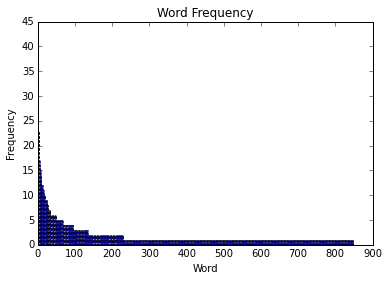

In [14]:
# YOUR CODE HERE
words, freq = zip(*swc) 
plt.bar(np.arange(len(words)), freq, linestyle="dotted")

plt.title("Word Frequency")
plt.xlabel("Word")
plt.ylabel("Frequency")

#plt.xticks(words)
#couldn't figure out how to format the plot correctly


ValueError: x and y must be the same size

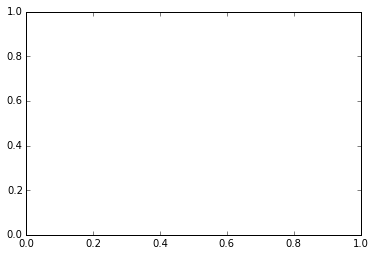

In [28]:
# YOUR CODE HERE
words, freq = zip(*swc) 
plt.scatter(freq, np.arange(0, len(words), -1))

plt.title("Word Frequency")
plt.xlabel("Word")
plt.ylabel("Frequency")

#plt.xticks(words)
#couldn't figure out how to format the plot correctly


In [22]:
assert True # use this for grading the dotplot